In [15]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [17]:
import pandas as pd

# Load the uploaded dataset
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# Clean & Preprocess the Data

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop 'CustomerID' as it's not needed
df_cleaned = df.drop("CustomerID", axis=1)

# Encode 'Gender'
le = LabelEncoder()
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Convert scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# Display the preprocessed data
df_scaled.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


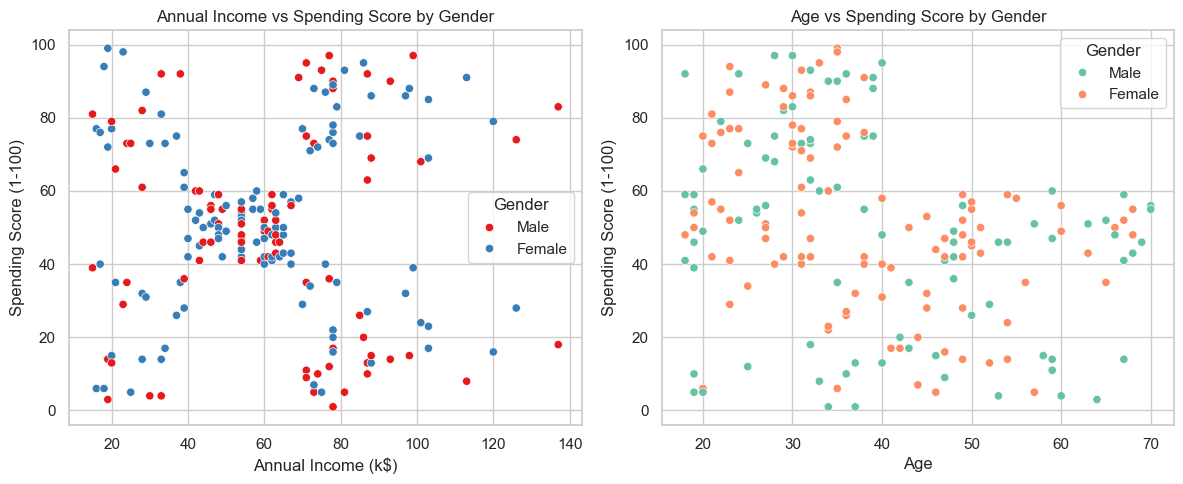

<Figure size 640x480 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualisation style
sns.set(style="whitegrid")

# Create scatter plots to visualise potential clustering structure
plt.figure(figsize=(12, 5))

# Scatter: Annual Income vs Spending Score (classic customer segmentation visual)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette="Set1")
plt.title("Annual Income vs Spending Score by Gender")

# Scatter: Age vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender", palette="Set2")
plt.title("Age vs Spending Score by Gender")

plt.tight_layout()
plt.show()




C:\Users\LENOVO USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

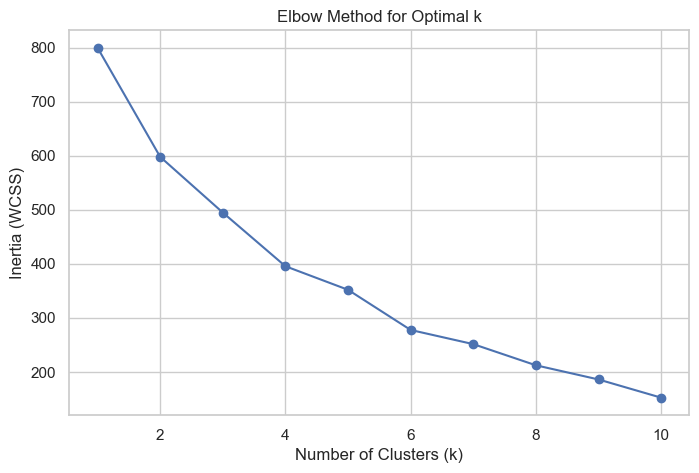

<Figure size 640x480 with 0 Axes>

In [45]:
from sklearn.cluster import KMeans
import numpy as np

# Run K-Means for a range of cluster values and store the inertia
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()





C:\Users\LENOVO USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


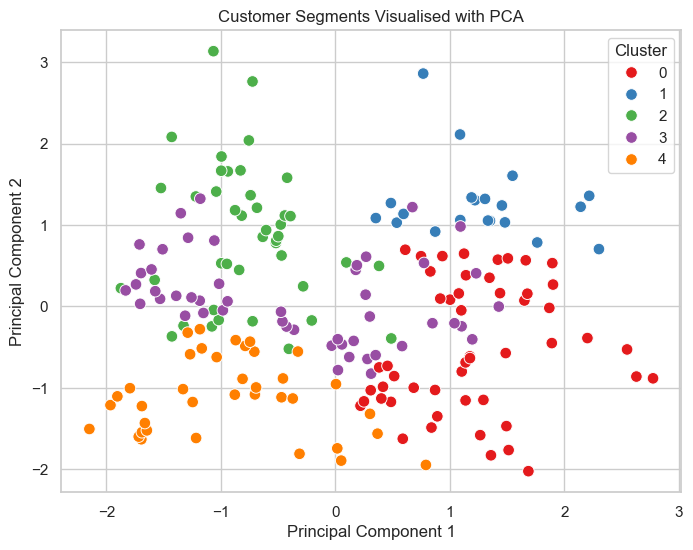

In [25]:
import os
from sklearn.decomposition import PCA

# Set environment variable to suppress MKL memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Apply KMeans clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df_clustered = df.copy()
df_clustered["Cluster"] = clusters

# Reduce dimensions for visualisation using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)
df_clustered["PCA1"] = reduced_data[:, 0]
df_clustered["PCA2"] = reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clustered, x="PCA1", y="PCA2", hue="Cluster", palette="Set1", s=70)
plt.title("Customer Segments Visualised with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [29]:
# Group by Cluster and calculate mean values for interpretation
cluster_profile = df_clustered.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

# Add gender distribution to the profile
gender_distribution = df_clustered.groupby("Cluster")["Gender"].value_counts(normalize=True).unstack().fillna(0)
gender_distribution.columns = ["% Female", "% Male"]
gender_distribution *= 100  # convert to percentages

# Combine cluster profile with gender distribution
cluster_summary = pd.concat([cluster_profile, gender_distribution], axis=1)

# Round the values for readability
cluster_summary = cluster_summary.round(2)

cluster_summary



,Age,Annual Income (k$),Spending Score (1-100),% Female,% Male
Cluster,,,,,
0,56.47,46.10,39.31,49.02,50.98
1,39.50,85.15,14.05,0.00,100.00
2,28.69,60.90,70.24,0.00,100.00
3,37.90,82.12,54.45,100.00,0.00
4,27.32,38.84,56.21,100.00,0.00


C:\Users\LENOVO USER\AppData\Local\Temp\ipykernel_24420\1433522302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary_reset, x="Cluster", y="Age", ax=axes[0], palette="Set2")
C:\Users\LENOVO USER\AppData\Local\Temp\ipykernel_24420\1433522302.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary_reset, x="Cluster", y="Annual Income (k$)", ax=axes[1], palette="Set2")
C:\Users\LENOVO USER\AppData\Local\Temp\ipykernel_24420\1433522302.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summ

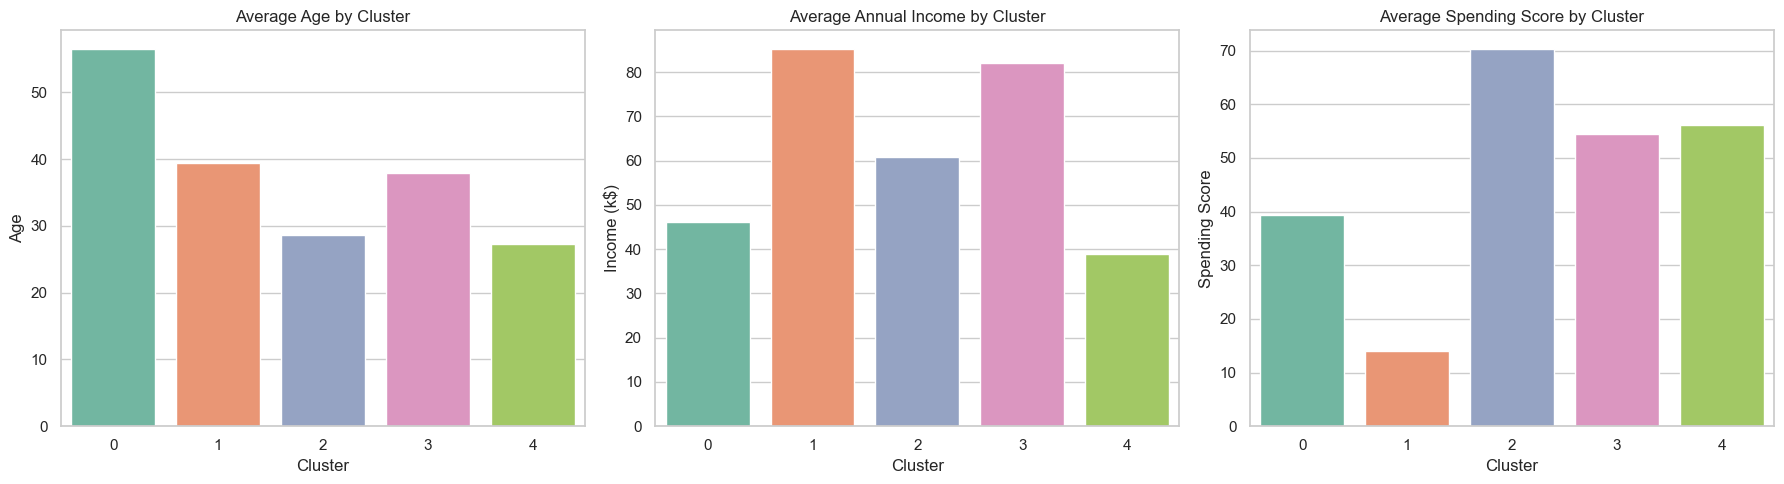

<Figure size 640x480 with 0 Axes>

In [47]:
# Reset index so we can use 'Cluster' as a regular column for seaborn plotting
cluster_summary_reset = cluster_summary.reset_index()

# Create bar plots using the corrected data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot for Age
sns.barplot(data=cluster_summary_reset, x="Cluster", y="Age", ax=axes[0], palette="Set2")
axes[0].set_title("Average Age by Cluster")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Age")

# Bar plot for Annual Income
sns.barplot(data=cluster_summary_reset, x="Cluster", y="Annual Income (k$)", ax=axes[1], palette="Set2")
axes[1].set_title("Average Annual Income by Cluster")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Income (k$)")

# Bar plot for Spending Score
sns.barplot(data=cluster_summary_reset, x="Cluster", y="Spending Score (1-100)", ax=axes[2], palette="Set2")
axes[2].set_title("Average Spending Score by Cluster")
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Spending Score")

plt.tight_layout()
plt.show()





In [35]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the current KMeans clustering
sil_score = silhouette_score(df_scaled, clusters)

sil_score


0.27191023466188324

In [37]:
# Use PCA-reduced data for clustering
pca_data = df_clustered[["PCA1", "PCA2"]]

# Apply KMeans on PCA-reduced data
kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

# Calculate silhouette score on PCA data
sil_score_pca = silhouette_score(pca_data, clusters_pca)

sil_score_pca


C:\Users\LENOVO USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4037689372474681

In [39]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering on PCA-reduced data
agglo = AgglomerativeClustering(n_clusters=5)
clusters_agglo = agglo.fit_predict(pca_data)

# Calculate Silhouette Score for Agglomerative Clustering
sil_score_agglo = silhouette_score(pca_data, clusters_agglo)

sil_score_agglo


0.34581930903235913

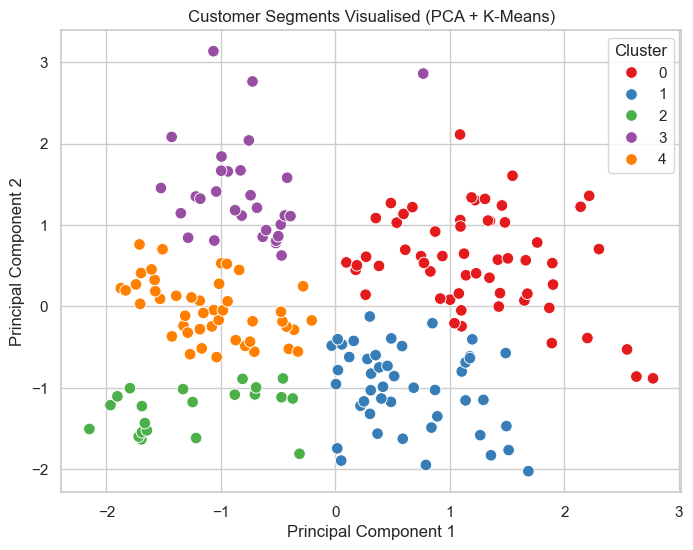

<Figure size 640x480 with 0 Axes>

In [49]:
# Add the final PCA-KMeans cluster labels to the PCA data
df_pca_clustered = pca_data.copy()
df_pca_clustered["Cluster"] = clusters_pca

# Plot the PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_clustered, x="PCA1", y="PCA2", hue="Cluster", palette="Set1", s=70)
plt.title("Customer Segments Visualised (PCA + K-Means)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()



